### Importing Libraries

In [1]:
import pandas as pd
import glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

### Set path for images and the CSV file and load the .CSV file

In [2]:
image_paths = glob.glob(r'C:\Users\ABHI\CodeAlpha Projects\handwritten\img\*')  # Path for images
df = pd.read_csv("english.csv")   #CSV file
print(df.head())

                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0


### Sorting image paths and list labels

In [3]:
image_paths = sorted(image_paths)
labels = df['label'].tolist()

### Load, Read and preprocess images

In [4]:
image_size = (32, 32)  #Resize to 32x32px
images = []
for path in image_paths:
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)  
    if img is not None:
        img_resized = cv2.resize(img, image_size) 
        images.append(img_resized.flatten()) 
    else:
        print(f"Image not found or invalid: {path}")

### Images and labels to numpy arrays

In [5]:
X = np.array(images)
y = np.array(labels)
print(X,y)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] ['0' '0' '0' ... 'z' 'z' 'z']


### Encode labels into integers

In [6]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(y_encoded)

[ 0  0  0 ... 61 61 61]


### Split data, Tain SVM model and Make predictions

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
svm_model = SVC(kernel='linear', random_state=42).fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

### Final Outcome with Predictions

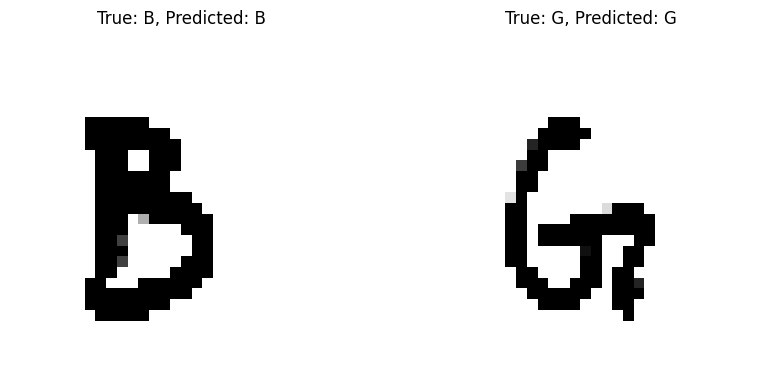

In [12]:
import random
random_indices = random.sample(range(len(X_test)), 2)  # Randomly select 2 indices

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_indices):
    img = X_test[idx].reshape(image_size)  # Reshape back to the original image size
    true_label = label_encoder.inverse_transform([y_test[idx]])[0]
    predicted_label = label_encoder.inverse_transform([y_pred[idx]])[0]

    plt.subplot(2, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')

plt.show()